### Analyzing the Stroop Effect

Investigating the [Stroop Effect](https://en.wikipedia.org/wiki/Stroop_effect), a classic phenomenon from experimental psychology. In psychology, the Stroop effect is a demonstration of interference in the reaction time of a task.

When the name of a color (e.g., "blue", "green", or "red") is printed in a color which is not denoted by the name (i.e., the word "red" printed in blue ink instead of red ink), naming the color of the word takes longer and is more prone to errors than when the color of the ink matches the name of the color.

Naming the font color of a printed word is an easier and quicker task if word meaning and font color are congruent. If both are printed in red, the average time to say "RED" in response to the word 'Green' is greater than the time to say "RED" in response to the word 'Mouse'.

![jpg](stroop-test-2.jpg)

I'll start of be defining the different types of variables in this experiment. The independent variable is the type of condition, while the dependent variable is the performance/duration of the task.

The null hypothesis would be that the performance of the incongruent task is better than or equal to the performance of the congruent task. Since in our dataset the performance is measured in duration and that a shorter duration means better performance, this translates our null hypothesis to be the incongruent task takes less than or equal time than the congruent task. As for the alternative hypothesis, it will be that the incongruent task takes more time than the congruent task.

**$t_{congruent}$: is the time to complete the congruent task**

**$t_{incongruent}$: is the time to complete the incongruent task**

**$H_{0}$**: **$t_{congruent}$** $\geq$ **$t_{incongruent}$** 

**$H_{1}$**: **$t_{congruent}$** < **$t_{incongruent}$**

**or alternatively it can be written as:**

**$H_{0}$**: **$t_{congruent}$** - **$t_{incongruent}$** $\geq$ 0

**$H_{1}$**: **$t_{congruent}$** - **$t_{incongruent}$** < 0 

**with an $\alpha$ value of 0.05**

For testing the hypothesis I will take a bootstrapping approach to simulate the results of a traditional hypothesis test, and will compare the results to a t-test. In both tests, I'll be comparing the difference in means of both groups.

I'll start the analysis by loading the data and exploring some descriptive statistics regarding this dataset.

In [1]:
# Importing the dataset
import pandas as pd

df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
# Check the dataset for null values and make sure that we have the correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [3]:
# Get summary statistics for the dataset
summary = df.describe()
summary

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [4]:
# Calculate the IQR
summary.loc['75%']-summary.loc['25%']

Congruent      4.30550
Incongruent    5.33475
dtype: float64

In [5]:
# Calculate the range
summary.loc['max']-summary.loc['min']

Congruent      13.698
Incongruent    19.568
dtype: float64

From the output above it is clear that the mean duration to finish the task for the incongruent (22.015917) is much higher than for the congruent (14.051125). Also you can see that based on the standard variations (std), IQRs (75%-25%) and range (max-min) that variation in durations to finish the task for the incongruent (4.797057, 5.33475, 19.568) is much higher than for the congruent (3.559358, 4.30550, 13.698).

To further analyze the distribution of the sample data, I'll plot some visualizations.

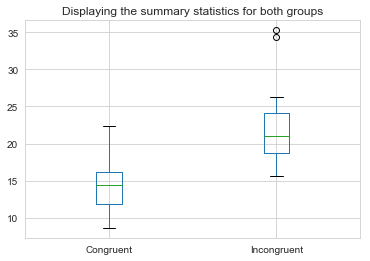

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

df.plot(kind='box', title='Displaying the summary statistics for both groups');

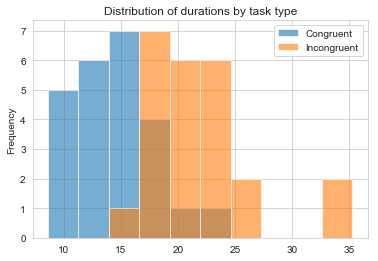

In [7]:
df.plot(kind='hist', alpha=0.6, title='Distribution of durations by task type');

From the box plot, you can see the summary statistics for both groups, an interesting thing to notice is that the range in the incongruent group is actually less than the congruent group if you exclude the outliers.

As for the histogram you can see visually from the distribution that the time average time needed to finish the task of the congruent group is much less than the incongruent group and even the overlap is relatively low.

Fianlly, I'll perform the statistical test and report your results.

In [8]:
# Importing the libraries
import numpy as np
import random

random.seed(42)

# Bootstrap the 10000 iterations
diff = []
size = df.shape[0]
for _ in range(10000):
    b_sample = df.sample(size, replace=True)
    b_con = b_sample['Congruent'].mean()
    b_incon = b_sample['Incongruent'].mean()
    diff.append(b_con - b_incon)

# Convert to NumPy array to be able to use the percentile function
diff = np.array(diff)

np.percentile(diff, 2.5), np.percentile(diff, 97.5)

(-9.935381249999997, -6.146265625000005)

In [9]:
import statsmodels.stats.api as sms

X1 = df['Congruent']
X2 = df['Incongruent']

# Performing a t-test
cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
# Alpha is set to 0.05 by default
cm.tconfint_diff(usevar='unequal')

(-10.424698188163974, -5.504885145169363)

As shown in the output both test show similar results, the 95% confidence interval doesn't include the 0. I chose the 95% confidence interval based on the $\alpha$ value of 5%. So based on these results we have evidence to reject the null hypothesis, which makes us 95% confident that on average participants of this test will perform better in the congruent task.

From my perspective this effect is due to the confusion of the different parts of our brain that comprehend the color and the text was written, which makes us take more time to sort out this contradiction. An alternative to this task would be something else that would cause a different contradiction like writing the words 'left' and 'right' on the opposite direction arrow and trying to say the direction instead of the word. But I think that difference in time in this test might be less like the word and the arrow are not as intertwined as the test we ran here.